## Data check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

In [5]:
zero_sum = 0
for columns in train_data:
    zero_sum = 0
    column_obj = train_data[columns]
    for data_in_column in column_obj:
        if(data_in_column == 0):
            zero_sum = zero_sum+1
    print("Current {0} shifted to zero percentage is {1:.4f}".format(columns, zero_sum/len(column_obj)))

Current id shifted to zero percentage is 0.0000
Current feature_0 shifted to zero percentage is 0.8847
Current feature_1 shifted to zero percentage is 0.8901
Current feature_2 shifted to zero percentage is 0.9349
Current feature_3 shifted to zero percentage is 0.7811
Current feature_4 shifted to zero percentage is 0.8838
Current feature_5 shifted to zero percentage is 0.9025
Current feature_6 shifted to zero percentage is 0.8087
Current feature_7 shifted to zero percentage is 0.6556
Current feature_8 shifted to zero percentage is 0.8005
Current feature_9 shifted to zero percentage is 0.6693
Current feature_10 shifted to zero percentage is 0.8639
Current feature_11 shifted to zero percentage is 0.7838
Current feature_12 shifted to zero percentage is 0.7741
Current feature_13 shifted to zero percentage is 0.9491
Current feature_14 shifted to zero percentage is 0.4175
Current feature_15 shifted to zero percentage is 0.5300
Current feature_16 shifted to zero percentage is 0.8568
Current fe

Let's make a heatmap first..so then see how it goes better..

In [6]:
train_data.corr()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
id,1.000000,0.000585,0.003878,-0.000729,-0.000573,-0.002459,0.001388,0.002562,-0.002593,0.000743,...,-0.000039,0.000635,0.000561,-0.004507,0.001714,-0.000549,-0.001905,-0.002497,0.001720,-0.001446
feature_0,0.000585,1.000000,0.009409,-0.005150,0.007556,-0.001383,-0.004215,0.004556,0.007358,-0.000675,...,0.005561,0.002689,0.000851,0.001722,0.007130,0.011503,0.006370,0.009593,0.005007,0.004884
feature_1,0.003878,0.009409,1.000000,0.005437,0.004034,0.006808,0.003550,0.010591,0.011225,0.005902,...,0.003197,0.006774,0.000930,0.001485,0.009856,0.001302,0.001621,0.004651,0.003449,0.006846
feature_2,-0.000729,-0.005150,0.005437,1.000000,0.006261,0.001187,0.005621,0.003256,0.007021,0.004419,...,0.002145,0.006023,-0.002452,0.015514,0.009142,-0.003528,0.002532,0.002284,0.003703,0.011090
feature_3,-0.000573,0.007556,0.004034,0.006261,1.000000,0.002121,-0.004890,0.008885,0.009060,0.009984,...,0.007692,0.005166,0.003764,0.007557,0.002554,0.002937,0.001478,0.005162,-0.005613,0.007009
feature_4,-0.002459,-0.001383,0.006808,0.001187,0.002121,1.000000,0.004858,0.004431,0.009257,0.009862,...,0.007492,0.007644,0.006602,0.003889,-0.000434,-0.000172,0.004466,0.002405,-0.000027,0.006742
feature_5,0.001388,-0.004215,0.003550,0.005621,-0.004890,0.004858,1.000000,-0.000673,0.009072,-0.001640,...,0.004225,0.005814,0.005704,0.010128,0.007404,0.004852,-0.000432,0.004903,0.006293,0.002617
feature_6,0.002562,0.004556,0.010591,0.003256,0.008885,0.004431,-0.000673,1.000000,0.009118,0.004583,...,0.009792,0.008931,0.002517,0.007941,0.002683,0.009715,0.002535,0.008581,0.004904,0.007396
feature_7,-0.002593,0.007358,0.011225,0.007021,0.009060,0.009257,0.009072,0.009118,1.000000,0.003761,...,0.000407,0.004515,0.004784,0.006054,0.008168,0.003116,0.011800,0.006200,0.000212,0.005469
feature_8,0.000743,-0.000675,0.005902,0.004419,0.009984,0.009862,-0.001640,0.004583,0.003761,1.000000,...,0.002922,0.002066,0.006651,0.003755,0.004375,0.005732,0.002411,-0.001253,0.003638,0.007822


<AxesSubplot:>

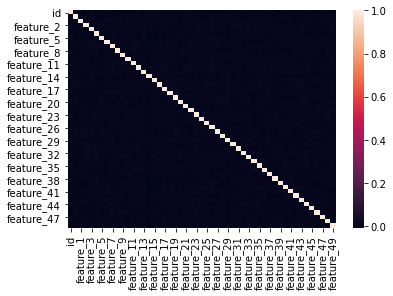

In [7]:
sns.heatmap(train_data.corr())

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

Seems there are no null values.. we better have to check data flow by diagram. Let's check feature 1 to 5

Well, we better have to normalize our data then!

In [21]:
target_data = train_data.iloc[:,-1]
train_data=train_data.drop(columns=['target'])
train_data=train_data.drop(columns=['id'])

In [22]:
train_data.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,...,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,2,0,0,0
7,0,0,0,2,0,0,3,0,0,6,...,0,0,1,0,0,0,0,2,0,0
8,0,1,0,0,0,0,0,0,15,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,1,0,0,0,0,0,1,1,...,2,1,0,0,0,0,0,0,1,0


In [15]:
target_data.head(10)

0    Class_2
1    Class_1
2    Class_1
3    Class_4
4    Class_2
5    Class_2
6    Class_1
7    Class_2
8    Class_2
9    Class_4
Name: target, dtype: object

Now.. we have to transform target to one hot encoding!

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

target_encoder = LabelBinarizer()
target_encoder.fit(target_data)
transformed_target = target_encoder.transform(target_data)
ohe_target = pd.DataFrame(transformed_target)

In [18]:
ohe_target.head(5)

,0,1,2,3
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(train_data)
data_scaled = pd.DataFrame(result)
data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.627143e-17,7.389644e-18,1.421085e-18,2.401634e-17,-1.136868e-18,-3.367973e-17,-3.744560e-17,-1.961098e-17,7.531753e-18,6.721734e-17,...,9.286794e-17,-6.714629e-18,4.149570e-17,-2.899014e-17,-3.577583e-17,2.316369e-17,2.131628e-17,-3.103295e-17,-1.968203e-17,4.632739e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.775265e-01,-2.182772e-01,-2.196578e-01,-3.201596e-01,-2.153173e-01,-2.675222e-01,-3.121419e-01,-4.563863e-01,-2.645055e-01,-4.937184e-01,...,-4.136646e-01,-2.905841e-01,-1.099276e+00,-2.610440e-01,-2.152683e-01,-2.449562e-01,-2.380072e-01,-2.622395e-01,-3.767946e-01,-3.314372e-01
25%,-2.775265e-01,-2.182772e-01,-2.196578e-01,-3.201596e-01,-2.153173e-01,-2.675222e-01,-3.121419e-01,-4.563863e-01,-2.645055e-01,-4.937184e-01,...,-4.136646e-01,-2.905841e-01,-2.300186e-01,-2.610440e-01,-2.152683e-01,-2.449562e-01,-2.380072e-01,-2.622395e-01,-3.767946e-01,-3.314372e-01
50%,-2.775265e-01,-2.182772e-01,-2.196578e-01,-3.201596e-01,-2.153173e-01,-2.675222e-01,-3.121419e-01,-4.563863e-01,-2.645055e-01,-4.937184e-01,...,-4.136646e-01,-2.905841e-01,-2.300186e-01,-2.610440e-01,-2.152683e-01,-2.449562e-01,-2.380072e-01,-2.622395e-01,-3.767946e-01,-3.314372e-01
75%,-2.775265e-01,-2.182772e-01,-2.196578e-01,-3.201596e-01,-2.153173e-01,-2.675222e-01,-3.121419e-01,-8.501444e-02,-2.645055e-01,3.144690e-02,...,1.671048e-01,-2.905841e-01,-2.300186e-01,-2.610440e-01,-2.152683e-01,-2.449562e-01,-2.380072e-01,-2.622395e-01,1.131335e-02,-3.314372e-01
max,1.048641e+01,1.545529e+01,1.132811e+01,1.377543e+01,1.342667e+01,1.636736e+01,1.120932e+01,1.105614e+01,1.115489e+01,8.434092e+00,...,1.178249e+01,1.568462e+01,1.585125e+01,1.371642e+01,1.412533e+01,1.751242e+01,1.311740e+01,1.654626e+01,1.669996e+01,1.156680e+01


In [24]:
data_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.277527,-0.218277,1.704970,-0.32016,0.143682,-0.267522,-0.312142,-0.456386,-0.264506,-0.493718,...,1.328643,-0.290584,-0.230019,8.633707,-0.215268,-0.244956,-0.238007,-0.262239,-0.376795,-0.331437
1,-0.277527,-0.218277,-0.219658,-0.32016,0.502682,1.395966,-0.312142,-0.456386,-0.264506,-0.493718,...,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,-0.376795,-0.331437
2,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,-0.456386,-0.264506,0.556612,...,-0.413665,-0.290584,0.204610,-0.261044,-0.215268,-0.244956,-0.238007,8.478180,0.399421,-0.331437
3,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,0.657729,-0.264506,-0.493718,...,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,0.011313,-0.331437
4,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,-0.456386,-0.264506,-0.493718,...,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,0.011313,-0.331437


<AxesSubplot:>

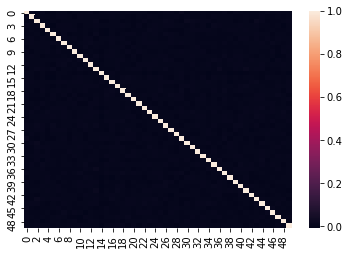

In [25]:
sns.heatmap(data_scaled.corr())

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result)
result

,0,1,2,3,4,5,6,7,8,9
0,-0.613514,1.239148,-2.581860,0.700141,0.934137,-0.268283,-1.718687,0.698126,0.037835,2.401564
1,-1.183401,0.000985,-0.088558,0.207242,0.409007,0.026181,0.592638,-0.131241,1.028228,-0.027389
2,3.057510,1.807363,1.769431,1.352289,2.706619,0.531787,1.428534,1.083143,-3.588543,0.951680
3,0.216421,-0.893368,0.706770,0.218399,-0.415117,-0.784224,0.578907,0.451159,0.508205,0.062880
4,-0.167490,-0.287044,-0.297161,0.183648,1.593810,-0.480775,-2.932480,-1.624815,2.132254,-0.906079
...,...,...,...,...,...,...,...,...,...,...
99995,-0.862909,0.242898,-0.340297,-0.318882,0.618104,0.640242,-0.187147,-0.623760,-0.152104,0.833339
99996,-0.648411,0.930781,0.973407,-0.690535,-0.979469,2.334142,0.393233,-0.793140,0.907251,0.852541
99997,0.132177,1.314303,0.172056,-0.665526,-1.573062,-0.382692,0.571817,-0.784411,-0.534164,0.032151
99998,-0.812571,0.240343,0.258241,-0.233574,-0.670406,-0.372728,0.122285,0.030887,-0.790463,-0.284934


<AxesSubplot:>

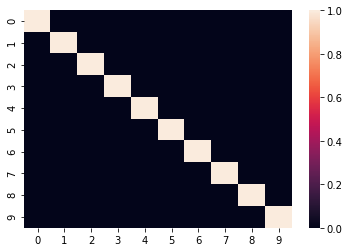

In [28]:
sns.heatmap(result.corr())